# Jogadores mais bem pagos da NBA por temporada

## Vamos trabalhar com os dados de salário dos jogadores da NBA, para inferir quantos jogadores ganham acima ou abaixo da média

- O exercício será o de descobrir quantos jogadores têm salário acima e abaixo da média, com 95% de confiança

## Importando as bibliotecas e lendo os dados

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
from scipy import stats

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r'./dados/NBA_season1718_salary.csv')

In [3]:
df.head()

,Player,Tm,season17_18
1,Stephen Curry,GSW,34682550.0
2,LeBron James,CLE,33285709.0
3,Paul Millsap,DEN,31269231.0
4,Gordon Hayward,BOS,29727900.0
5,Blake Griffin,DET,29512900.0


In [4]:
df.shape

(573, 3)

## Tratando o DataSet e os nomes das colunas

In [6]:
df.rename(columns={'season17_18': 'salary', 'Tm': 'team', 'Player': 'player'}, inplace=True)

In [7]:
df.head()

,player,team,salary
1,Stephen Curry,GSW,34682550.0
2,LeBron James,CLE,33285709.0
3,Paul Millsap,DEN,31269231.0
4,Gordon Hayward,BOS,29727900.0
5,Blake Griffin,DET,29512900.0


## Visualizando o número de jogadores por time

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

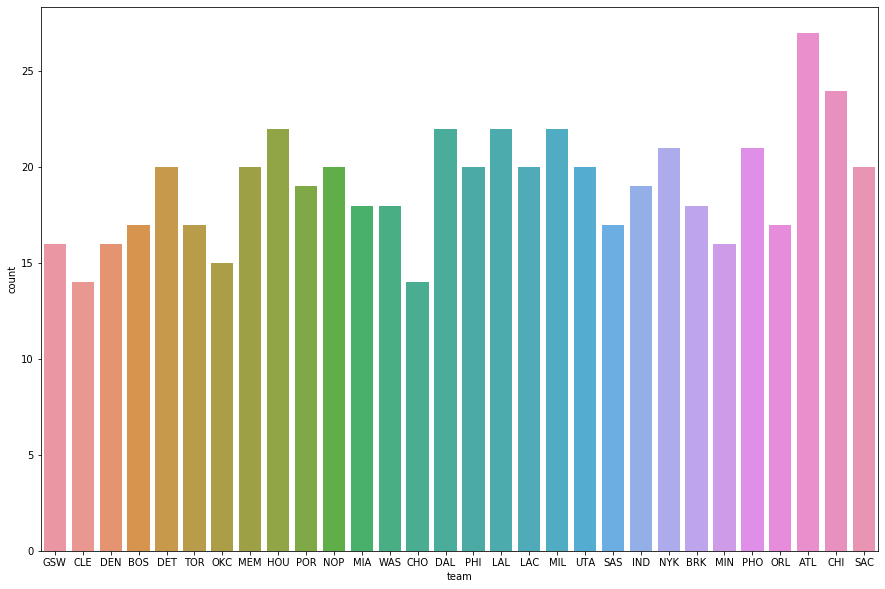

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(df.team)
plt.show()

## Visualizando o tipo de distribuição para os salários

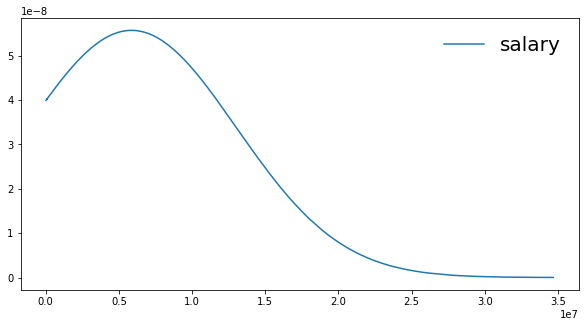

In [10]:
fig, ax = plt.subplots(1, 1,figsize=(10,5))

x = df.salary
mu = df.salary.mean()
sigma = df.salary.std()
y = stats.norm.pdf(x, mu, sigma)


ax.plot(x, y,label='salary')

ax.legend(loc='best', frameon=False,fontsize = 20)
plt.show()

Percebemos que a distribuição se parece com uma normal, mas tem uma forte assimetria para a direita

## Transformando os dados em uma distribuição normal por média das médias

Não conseguimos trabalhar dessa forma pois perdemos a interpretabilidade dos dados

(5868504.584615035, 323980.7894656478)

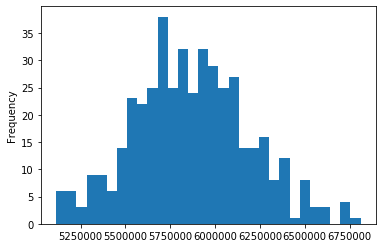

In [11]:
def sample(df, n):
    index = np.random.choice(range(0, len(df)), size = n)
    df_s = np.array(df.iloc[index,])
    return(df_s)

def samp_mean(df, sample_size, num_samples):
    means = []
    for reps in range(0, num_samples):
        s_ = sample(df, sample_size)
        m_ = s_.mean()
        means.append(m_)
    return(means)

sample_size = 500
num_samples = 1000

sample_df = pd.Series(samp_mean(df['salary'], sample_size, num_samples), name = 'Casados')
sample_df.plot.hist(bins = 30)

sample_df.mean(), sample_df.std()

In [12]:
sample_df.head()

0    6253668.506
1    6332605.428
2            NaN
3            NaN
4            NaN
Name: Casados, dtype: float64

Dessa forma conseguimos normalizar os dados mas não conseguimos utilizar a variável por ser impossível interpretar os resultados.

## Normalizando os dados de salário

Mudando a estratégia de normalização, vamos utilizar a função LOG (logarítmo natural) para corrigir a assimetria à direita e depois normalizar a coluna inteira (subtrair a média e dividir pelo desvio-padrão)

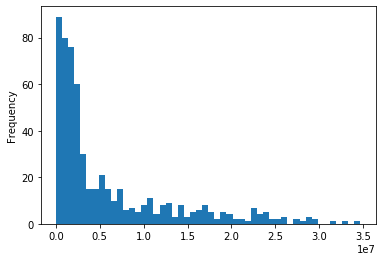

In [13]:
df['salary'].plot.hist(bins=50)

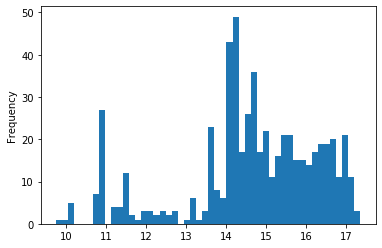

In [14]:
df['log_salary'] = np.log(df['salary']) #criando uma coluna chamada log_salary
df['log_salary'].plot.hist(bins=50) 

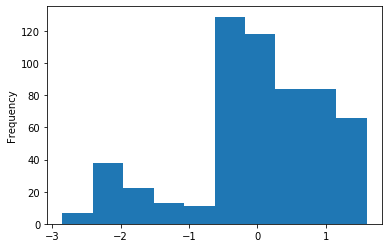

In [15]:
#essa é a normalização - criando outra coluna chamada normal_log_salary
#normalização pela subtração da média e dividido pelo desvio padrão, próprios
df['normal_log_salary'] = ( df['log_salary'] - df['log_salary'].mean() ) / df['log_salary'].std() #criando a coluna
df['normal_log_salary'].plot.hist(bins=10) 

### Verificando a média e o desvio-padrão

In [16]:
x = df['normal_log_salary'] #estudando a coluna normalizada, 

mu = np.mean(x)
std = np.std(x)
mu,std

(-2.4014978040353388e-14, 0.9991254917435292)

### Verificando o p-value

In [17]:
import scipy
from scipy import stats

In [18]:
scipy.stats.norm(mu, std).pdf(2*std) #o p_value é o valor fora dos 95% , neste caso melhor se fosse, 0,05

0.05403822338570128

In [19]:
2* (1 - scipy.stats.norm(mu, std).cdf(2*std))

0.04550026389635575

In [20]:
2* (scipy.stats.norm(mu, std).sf(2*std))

0.04550026389635583

### Verificando o Z-score

In [21]:
scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)

(-1.9582499798532123, 1.9582499798531643)

In [22]:
Z_score_inf = scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[0]
Z_score_sup = scipy.stats.norm.interval(alpha=0.95,loc=mu,scale=std)[1]

Com os limites para o Alpha de 0.95 conseguimos executar a inferência e descobrir quais jogadores têm salário acima ou abaixo da média com um nível de confiança de 95%.

### Jogadores que ganham abaixo da média

In [23]:
df[df['normal_log_salary']<-1.96] #mascara para os abaixo da média

,player,team,salary,log_salary,normal_log_salary
529,Demetrius Jackson,HOU,74159.0,11.213967,-1.996169
530,Georgios Papagiannis,POR,74159.0,11.213967,-1.996169
531,Larry Drew,NOP,74159.0,11.213967,-1.996169
532,Scotty Hopson,DAL,74159.0,11.213967,-1.996169
533,Isaiah Canaan,HOU,53465.0,10.886783,-2.187384
534,Tyler Cavanaugh,ATL,50000.0,10.819778,-2.226543
535,Kyle Collinsworth,DAL,50000.0,10.819778,-2.226543
536,Demetrius Jackson,HOU,50000.0,10.819778,-2.226543
537,Daniel Ochefu,WAS,50000.0,10.819778,-2.226543
538,Michael Young,WAS,50000.0,10.819778,-2.226543


In [24]:
# Quantidade de jogadores abaixo da média
df[df['normal_log_salary']<-1.96].shape #total abaixo da média

(45, 5)

In [25]:
df[df['normal_log_salary']<-1.96]['team'].value_counts() #por time

HOU    5
DAL    5
LAL    4
ATL    3
MIL    3
NOP    3
UTA    3
CHI    2
DET    2
MEM    2
PHI    2
WAS    2
POR    1
MIA    1
BRK    1
CLE    1
IND    1
ORL    1
TOR    1
LAC    1
NYK    1
Name: team, dtype: int64

Podemos concluir que 45 jogadores ganham abaixo da média.

### Jogadores que ganham acima da média

In [26]:
df[df['normal_log_salary']>1.96] #mascara dos acima da média

,player,team,salary,log_salary,normal_log_salary


In [27]:
df.sort_values('normal_log_salary',ascending = False).head() #cinco mais bem pagos

,player,team,salary,log_salary,normal_log_salary
1,Stephen Curry,GSW,34682550.0,17.361747,1.596760
2,LeBron James,CLE,33285709.0,17.320639,1.572736
3,Paul Millsap,DEN,31269231.0,17.258145,1.536213
4,Gordon Hayward,BOS,29727900.0,17.207597,1.506671
5,Blake Griffin,DET,29512900.0,17.200338,1.502429


### Explorando o salário mais alto do DataSet

Como não temos jogadores com salário acima da média, vamos descobrir qual o nível de confiança necessário para o máximo salário 

In [28]:
df['normal_log_salary'].max() #valor máximo da coluna

1.596760448248424

In [29]:
scipy.stats.norm(mu, std).sf(df['normal_log_salary'].max()) #p_value

0.05500390350185866

In [30]:
alpha_max = 1-scipy.stats.norm(mu, std).sf(df['normal_log_salary'].max())
#alfa máximo - são os 95%, área da curva embaixo da curva de não rejeição - 
#valores entre 2 desvios padrão para mais e 2 para menos
alpha_max 

0.9449960964981413

In [31]:
print ('Temos 95% de certeza que não existe nenhum jogador ganhando mais que a média. O jogador mais bem remunerado está com um nível de significância de', round(alpha_max*100,3), '%')

Temos 95% de certeza que não existe nenhum jogador ganhando mais que a média. O jogador mais bem remunerado está com um nível de significância de 94.5 %


# Olhando para os times individualmente

<br>
<img src="img/nba_teams.png" />
<br>

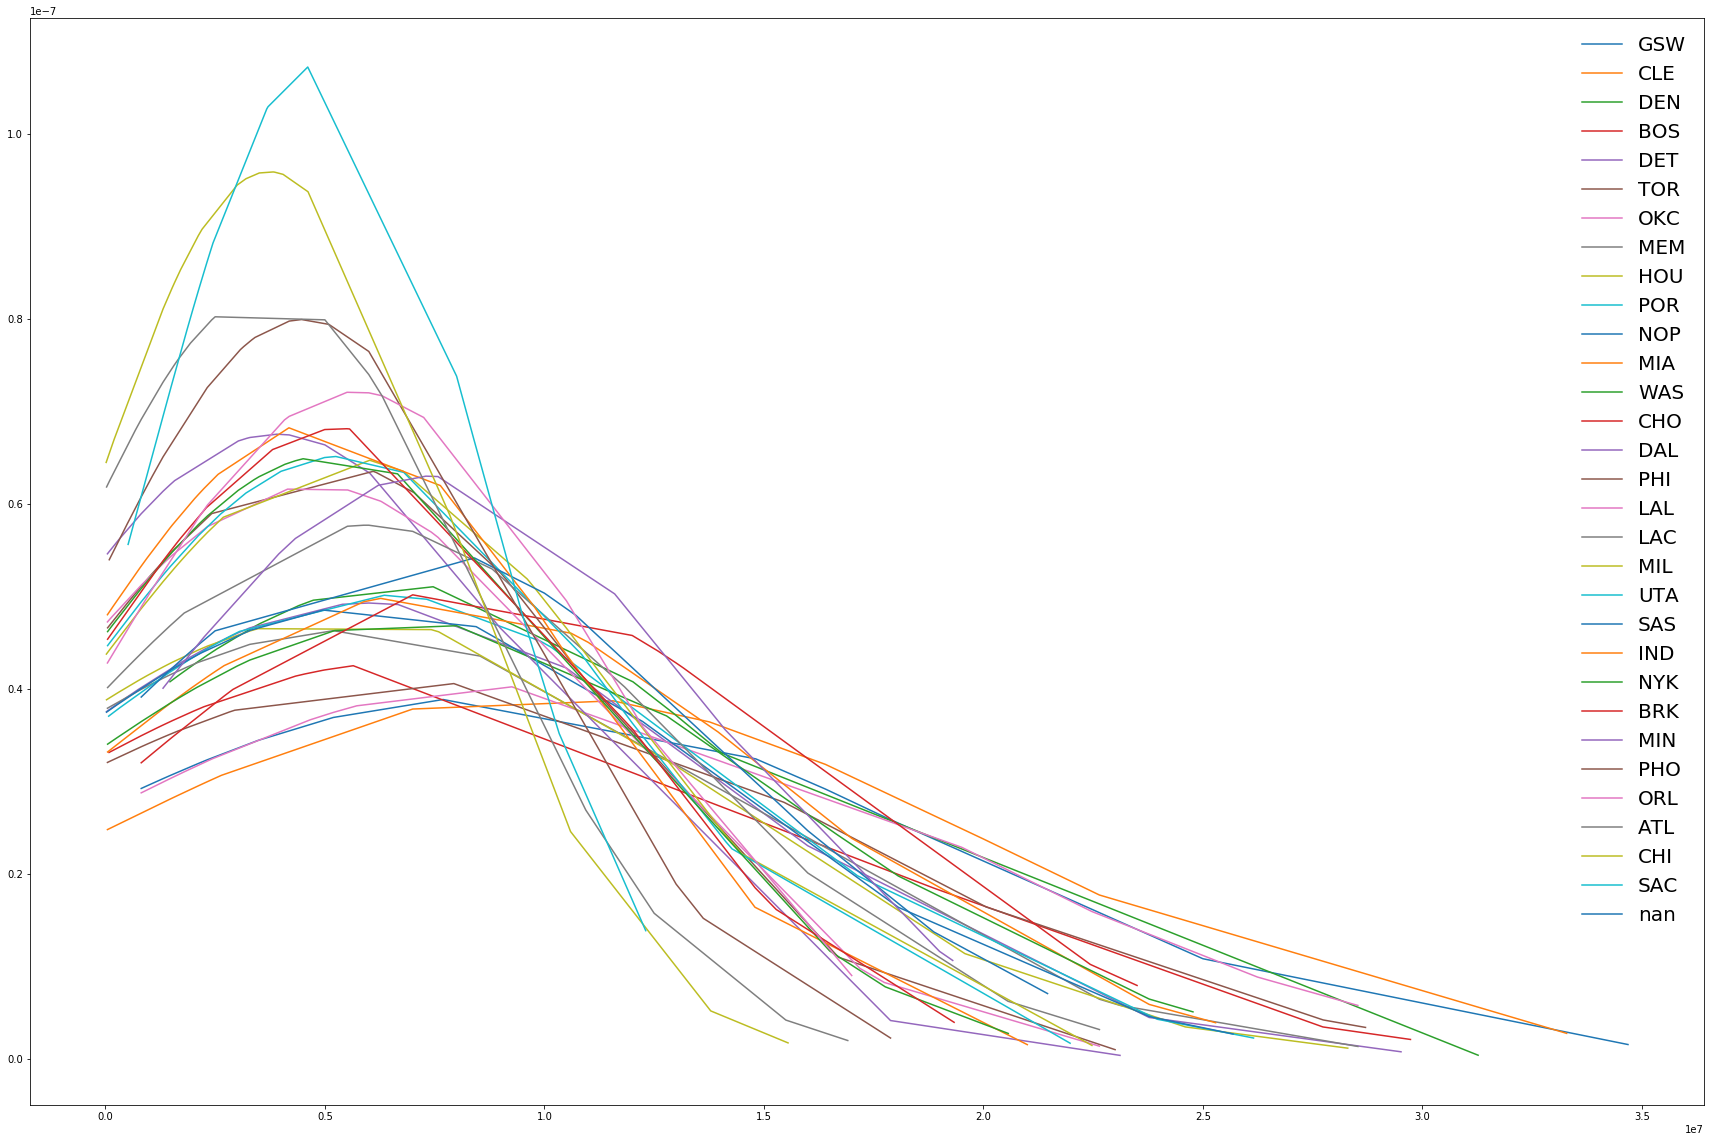

In [32]:
fig, ax = plt.subplots(1, 1,figsize=(30,20))


for i in df.team.unique():

    x = df[df.team == i]['salary']
    mu = df[df.team == i]['salary'].mean()
    sigma = df[df.team == i]['salary'].std()

    ax.plot(x, stats.norm.pdf(x, mu, sigma),label=i)

ax.legend(loc='best', frameon=False,fontsize = 20)
#a mesma assimetria original agora poor linhas - times

## Fazendo a inferência para o GSW (Golden State Warriors)

In [33]:
gsw = df[df.team == 'GSW']
gsw

,player,team,salary,log_salary,normal_log_salary
1,Stephen Curry,GSW,34682550.0,17.361747,1.596760
16,Kevin Durant,GSW,25000000.0,17.034386,1.405442
53,Klay Thompson,GSW,17826150.0,16.696177,1.207783
65,Draymond Green,GSW,16400000.0,16.612792,1.159051
75,Andre Iguodala,GSW,14814815.0,16.511138,1.099642
146,Shaun Livingston,GSW,7692308.0,15.855731,0.716604
197,Nick Young,GSW,5192000.0,15.462630,0.486865
239,Zaza Pachulia,GSW,3477600.0,15.061853,0.252640
299,David West,GSW,2328652.0,14.660800,0.018254
321,JaVale McGee,GSW,2116955.0,14.565489,-0.037448


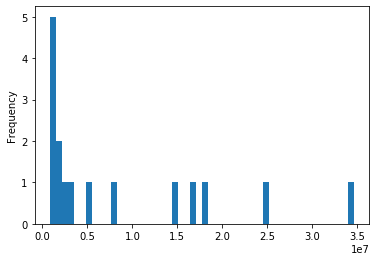

In [34]:
gsw.salary.plot.hist(bins=50)

## Normalizando os dados

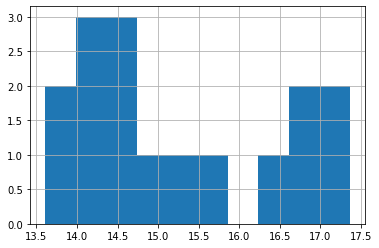

In [35]:
gsw['log_salary'] = np.log(gsw['salary']) 
gsw['log_salary'].hist()

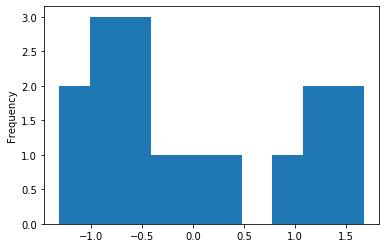

In [36]:
gsw['normal_log_salary'] = ( gsw['log_salary'] - gsw['log_salary'].mean() ) / gsw['log_salary'].std()
gsw['normal_log_salary'].plot.hist()

## Verificando as estatísticas

In [37]:
x_gsw = gsw['normal_log_salary']

mu_gsw = np.mean(x_gsw)
std_gsw = np.std(x_gsw)
mu_gsw,std_gsw

(-6.938893903907228e-16, 0.9682458365518541)

In [38]:
# p-value para distribuição normal

scipy.stats.norm(mu_gsw, std_gsw).pdf(2*std_gsw)

0.05576163044032515

In [39]:
# z-score para distribuição normal

scipy.stats.norm.interval(alpha=0.95,loc=mu_gsw,scale=std_gsw)

(-1.8977269678224906, 1.8977269678224893)

## Buscando jogadores com salários acima ou abaixo da média

In [40]:
# Utilizando a estatística t-student

scipy.stats.t.interval(alpha=0.95,df=(len(gsw['normal_log_salary'])-1),loc=mu_gsw,scale=std_gsw)

(-2.0637671483081568, 2.063767148308155)

In [41]:
Z_score_inf_gsw = scipy.stats.t.interval(alpha=0.95,df=(len(gsw['normal_log_salary'])-1),loc=mu_gsw,scale=std_gsw)[0]
Z_score_inf_gsw

-2.0637671483081568

In [42]:
gsw[gsw['normal_log_salary']<Z_score_inf_gsw]

,player,team,salary,log_salary,normal_log_salary


In [43]:
Z_score_sup_gsw = scipy.stats.t.interval(alpha=0.95,df=(len(gsw['normal_log_salary'])-1),loc=mu_gsw,scale=std_gsw)[1]
Z_score_sup_gsw

2.063767148308155

In [44]:
gsw[gsw['normal_log_salary']>Z_score_sup_gsw]

,player,team,salary,log_salary,normal_log_salary


Podemos concluir no GSW (Gosden State Warriors) não temos nenhum jogador nem acima nem abaixo da média.

#### Testando a estatística para o valor máximo

In [45]:
gsw['normal_log_salary'].max()

1.6760371744335238

In [46]:
alpha_max = 1-scipy.stats.t.sf(x=gsw['normal_log_salary'].max(), df=gsw['normal_log_salary'], loc=mu_gsw, scale=std_gsw)[0]
alpha_max

0.8754721147554214

# Estratégia de definição dos salários da NBA

O teto salarial da NBA é o limite para a quantia total que as equipes da Associação Nacional de Basquete podem pagar a seus jogadores. Como muitas ligas esportivas profissionais, a NBA tem um teto salarial para controlar os custos e beneficiar a paridade, definida pelo acordo coletivo da liga (CBA). Esse limite está sujeito a um complexo sistema de regras e exceções e é calculado como uma porcentagem da receita da liga em relação à temporada anterior. De acordo com a CBA ratificada em dezembro de 2011, o teto continuará a variar nas temporadas futuras com base nas receitas da liga. Para a temporada 2015-2016, o teto salarial foi de USD 70 milhões e o limite de imposto de luxo foi de USD 84,74 milhões. Para a temporada 2016–17, o teto salarial foi estabelecido em USD 94,14 milhões e o limite de imposto de luxo foi de USD 113,29 milhões. Para a temporada de 2017–18, o limite é estabelecido em USD 99 milhões para o teto salarial e USD 119 milhões para o imposto de luxo.

A maioria das ligas (NFL, NHL, MLS) tem capas rígidas, enquanto a NBA tem um teto salarial suave. Regras salariais duras proíbem que as equipes superem o teto salarial. Os tetos salariais suaves permitem que as equipes ultrapassem o teto salarial, mas sujeitarão essas equipes a privilégios reduzidos na livre agência. As equipes que estão acima do teto de imposto de luxo estão sujeitas ao imposto de luxo (um imposto sobre cada dólar gasto acima do teto de imposto de luxo).

Para saber mais [clique aqui](https://en.wikipedia.org/wiki/NBA_salary_cap)

# Acordo de Negociação Coletiva da NBA

O Acordo de Negociação Coletiva da NBA (CBA) é o contrato entre a NBA (o comissário e os 30 proprietários da equipe) e a Associação de Jogadores da NBA que dita as regras dos contratos com jogadores, negociações, distribuição de receita, o Draft da NBA e o teto salarial. entre outras coisas. Em junho de 2005, a CBA da NBA de 1999 expirou, o que significa que a Liga e o sindicato dos jogadores tiveram que negociar um novo acordo; À luz do bloqueio da NHL em 2004-05, os dois lados rapidamente chegaram a um acordo e ratificaram uma nova ACB em julho de 2005. Esse acordo expirou após a temporada 2010-2011, levando ao bloqueio da NBA de 2011. Um novo CBA foi ratificado em dezembro de 2011, encerrando o bloqueio.

Pouco mudou em termos do teto salarial entre as versões de 1999 e 2005 da CBA. Em troca de concordar com a controversa idade mínima do jogador, os jogadores receberam uma porcentagem ligeiramente maior das receitas da Liga ao longo do novo acordo. Além disso, o salário máximo da Liga diminuiu ligeiramente em comparação com o CBA de 1999. Sob o CBA de 2011, os jogadores receberão uma porcentagem menor das receitas da liga.

Em 2005, os jogadores receberam 57% da receita e, a partir da nova CBA, estão recebendo cerca de 49% a 50% da receita. Naquela época, a próxima discussão da CBA foi definida por dez anos. ou, se necessário, em 2017. [2] Em 2016, a NBA e a NBA Players Association se reuniram para trabalhar em um novo CBA, que ambos os lados aprovaram em dezembro daquele ano. Este acordo mais recente começará com a temporada 2017-2018 e será executado entre 2023 e 2424, com um cancelamento mútuo após 2022-23.

Para saber mais [clique aqui](https://en.wikipedia.org/wiki/NBA_Collective_Bargaining_Agreement)